# Image Classification Using Convolutional Neural Network

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from PIL import Image

# Loading the Cifar10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

(50000, 32, 32, 3) means: 50,000 images, each with a size of 32x32 pixels and 3 color channels (RGB).

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5] # This is a slicing operation which returns the first 5 elements

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our analysis we need a 1D array. So we will convert y_train to 1D array.

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some of the images from the dataset

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

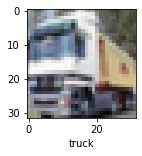

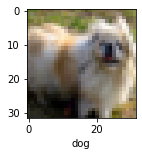

In [10]:
plot_sample(X_train, y_train, 1) # 2nd entry of dataset
plot_sample(X_train, y_train, 40) # 41st entry of dataset

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train = X_train / 255
X_test = X_test / 255

# Building a convolutional neural network for image classification

In [32]:
cnn = models.Sequential([
    layers.Conv2D(filters=50, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=75, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=125, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(125, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.2513 - accuracy: 0.5518
Epoch 2/5
1563/1563 [==============================] - 183s 117ms/step - loss: 0.8753 - accuracy: 0.6931
Epoch 3/5
1563/1563 [==============================] - 191s 122ms/step - loss: 0.7152 - accuracy: 0.7487
Epoch 4/5
1563/1563 [==============================] - 178s 114ms/step - loss: 0.6119 - accuracy: 0.7852
Epoch 5/5
1563/1563 [==============================] - 185s 118ms/step - loss: 0.5221 - accuracy: 0.8152


In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.7389 - accuracy: 0.7576


[0.7389063239097595, 0.7576000094413757]

# Testing the trained model on images outside the dataset

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

def predict_image(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    return prediction

In [41]:
uploaded_image_path = input("Enter the path to the JPG image you want to test: ")

prediction = predict_image(uploaded_image_path, cnn)

class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

predicted_class_index = np.argmax(prediction)
predicted_class = class_labels[predicted_class_index]
confidence = prediction[0][predicted_class_index]

print("Predicted class:", predicted_class)
print("Confidence:", confidence)

Enter the path to the JPG image you want to test: truck1.png
Predicted class: truck
Confidence: 0.98568326
